# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return response_train, response_train_pred, response_test, response_test_pred

def generateConfusionMatrix(response, response_pred, title):
    print(title)
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, response_train)
    plt.plot(predictor_train, b + a * predictor_train, color = "red")
    plt.xlabel(predictor.columns[0])
    plt.ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.40934698]
Coefficients 	: a =  [[0.22437139]]
R^2 0.005448327089649485


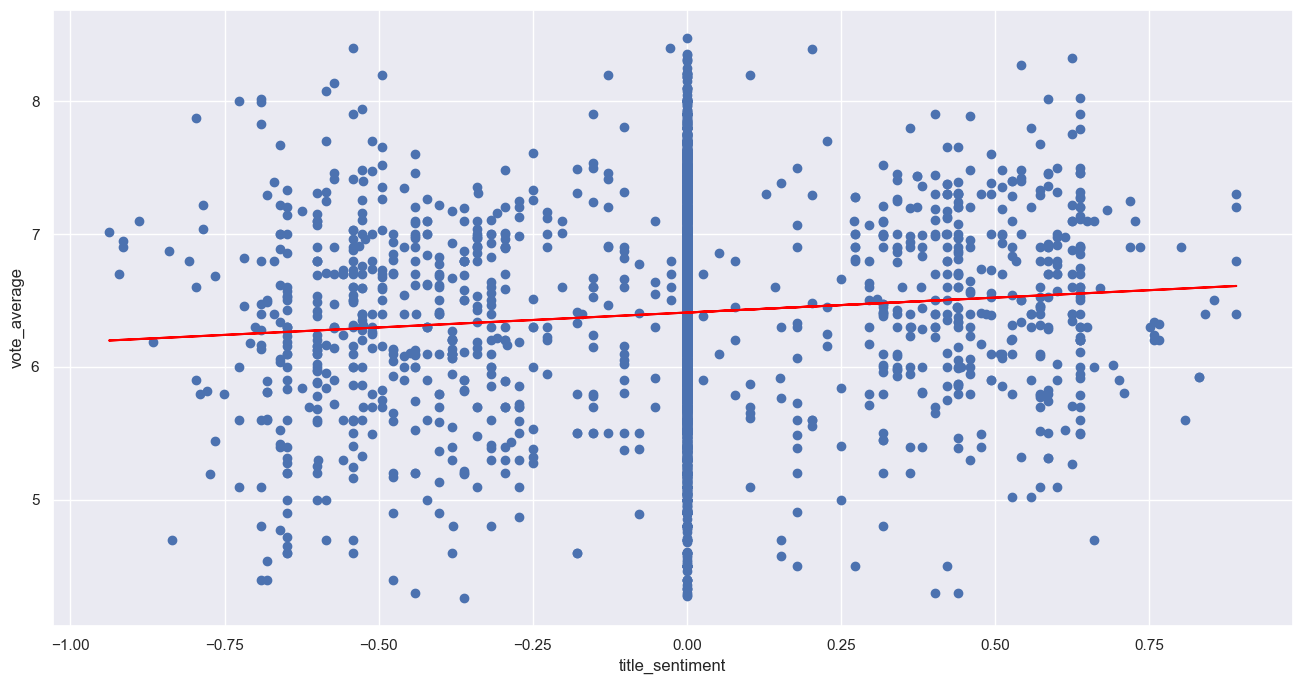

Intercept 	: b =  [6.43125864]
Coefficients 	: a =  [[0.12588593]]
R^2 0.011117942267363068


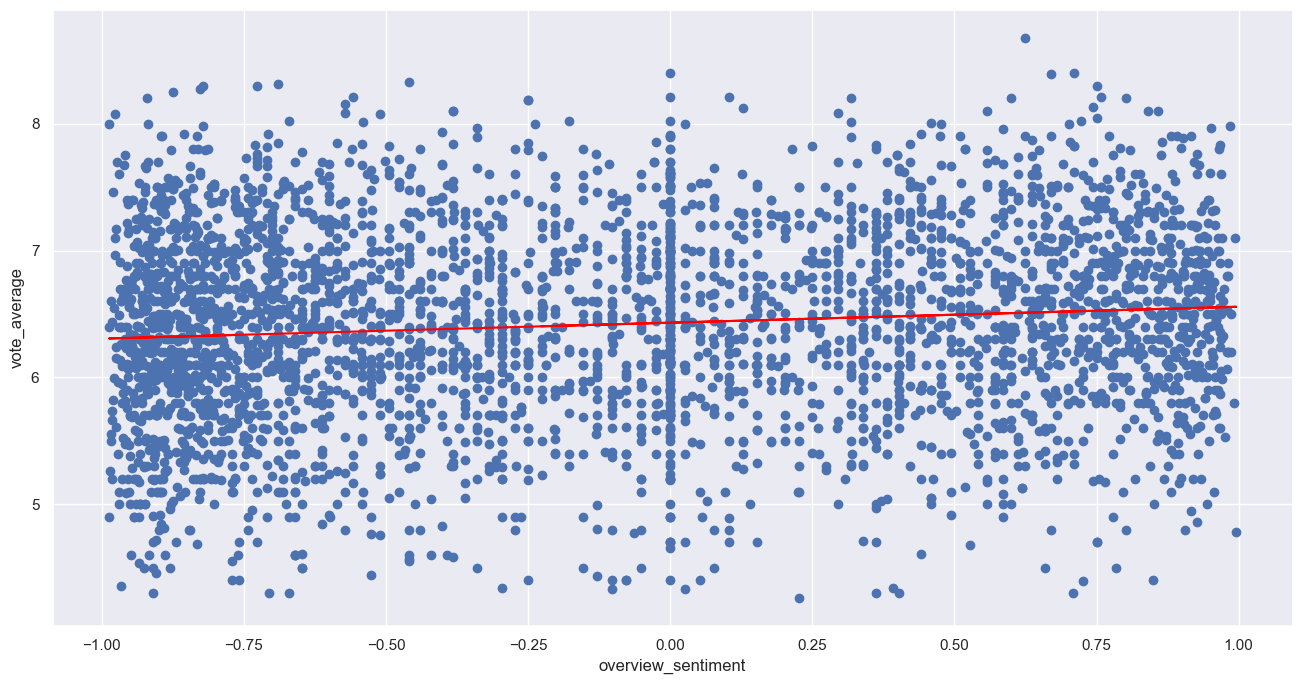

Intercept 	: b =  [6.3152893]
Coefficients 	: a =  [[0.00643497]]
R^2 0.006720770885398242


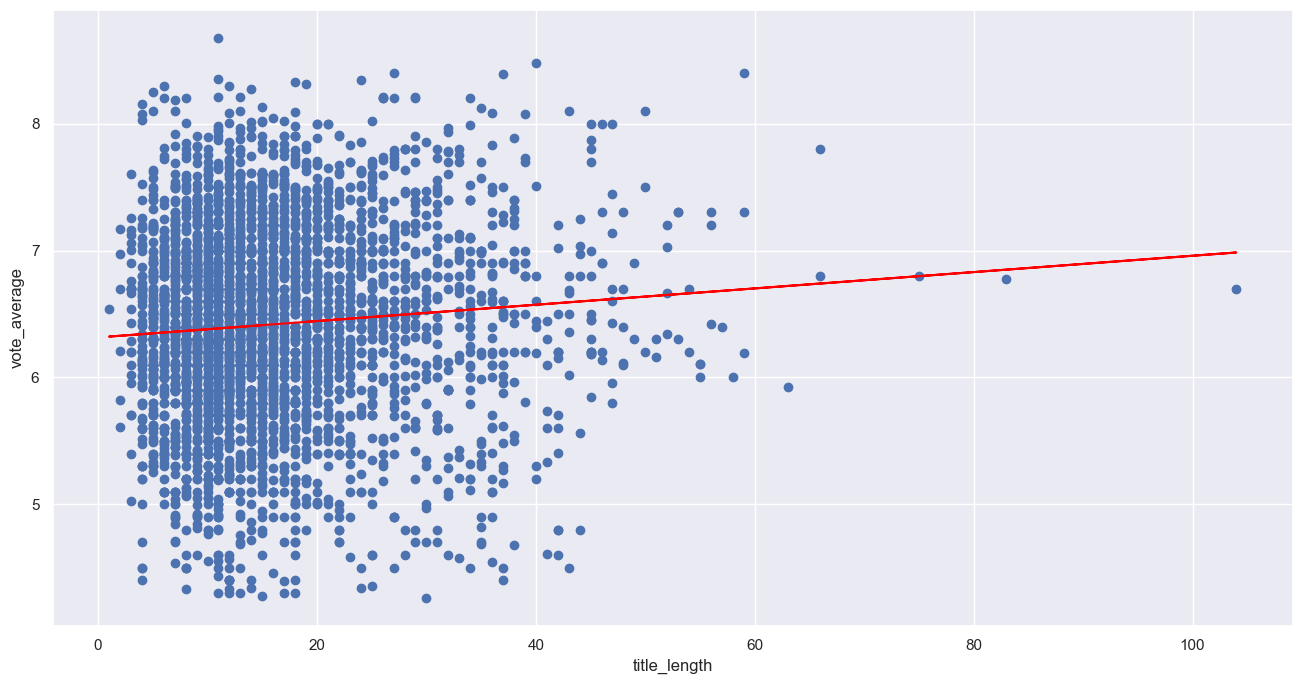

Intercept 	: b =  [6.32939146]
Coefficients 	: a =  [[0.03379345]]
R^2 0.00623269276134597


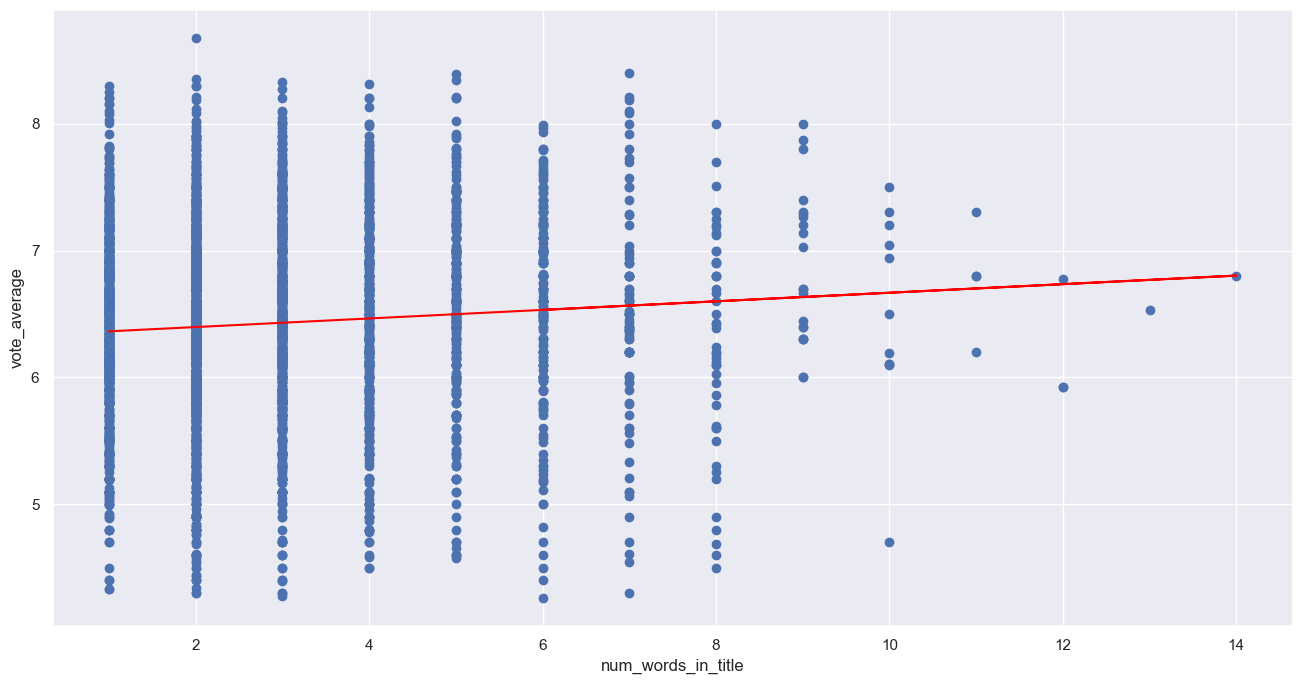

Intercept 	: b =  [6.45828867]
Coefficients 	: a =  [[-0.00716029]]
R^2 0.0002966518683190644


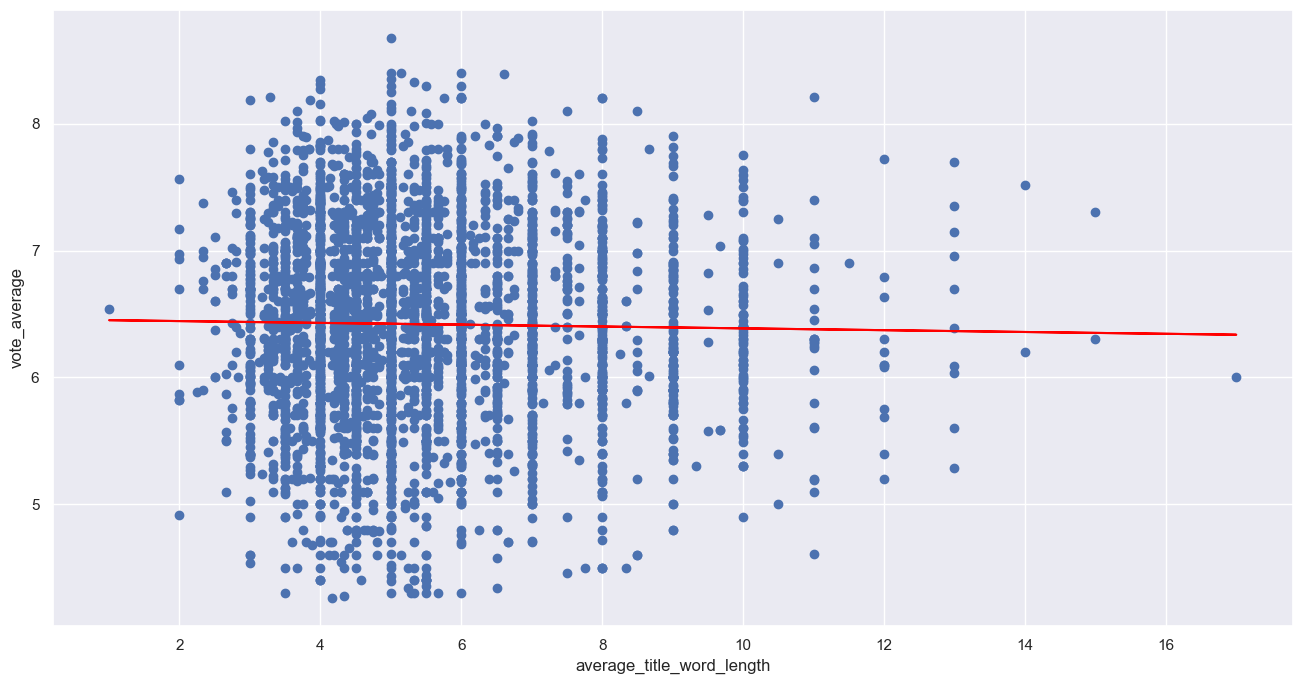

Intercept 	: b =  [6.40762562]
Coefficients 	: a =  [[0.09666458]]
R^2 0.002750690188743743


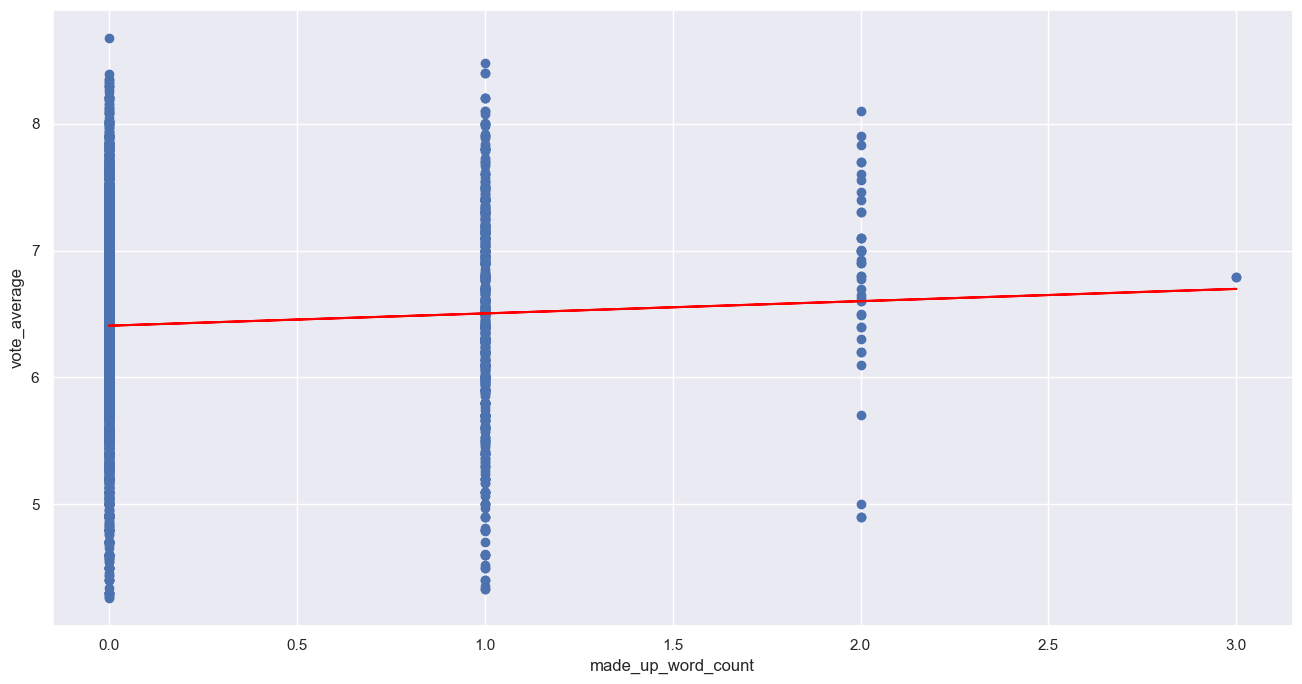

In [6]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [20.96249239]
Coefficients 	: a =  [[-0.21539032]]
R^2 8.607895763090845e-05


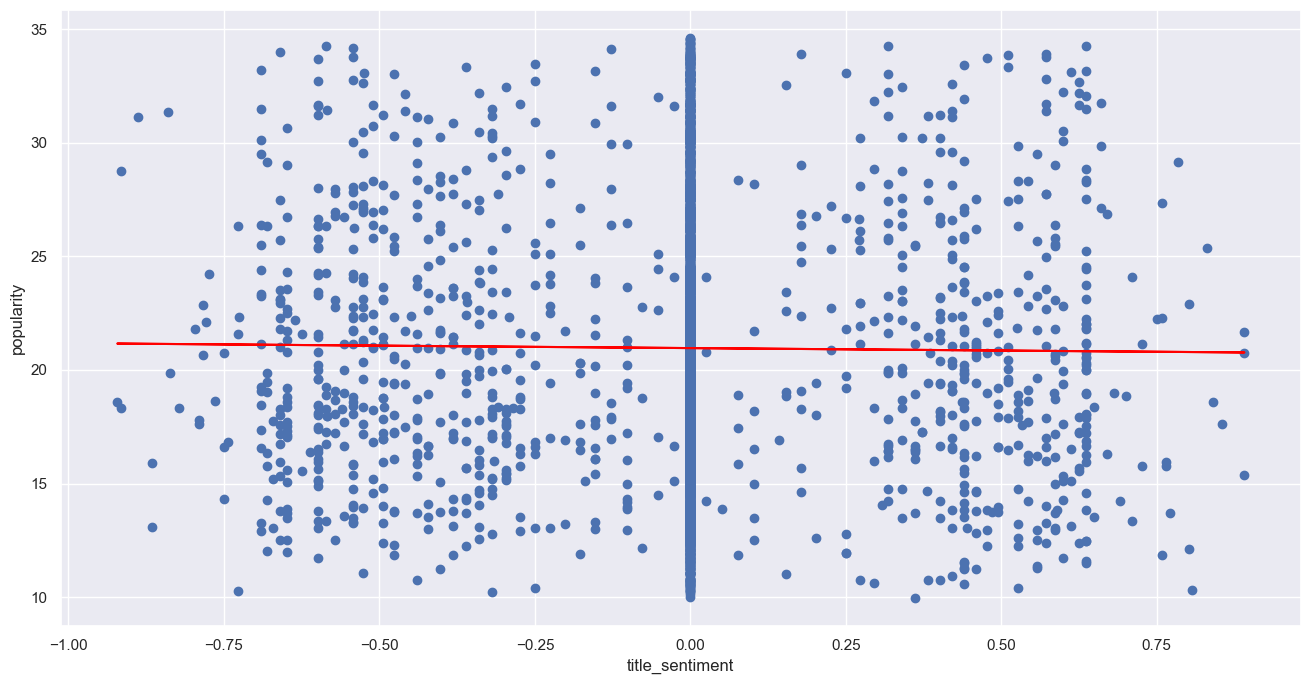

Intercept 	: b =  [21.0204034]
Coefficients 	: a =  [[-0.15590847]]
R^2 0.0002895153445544585


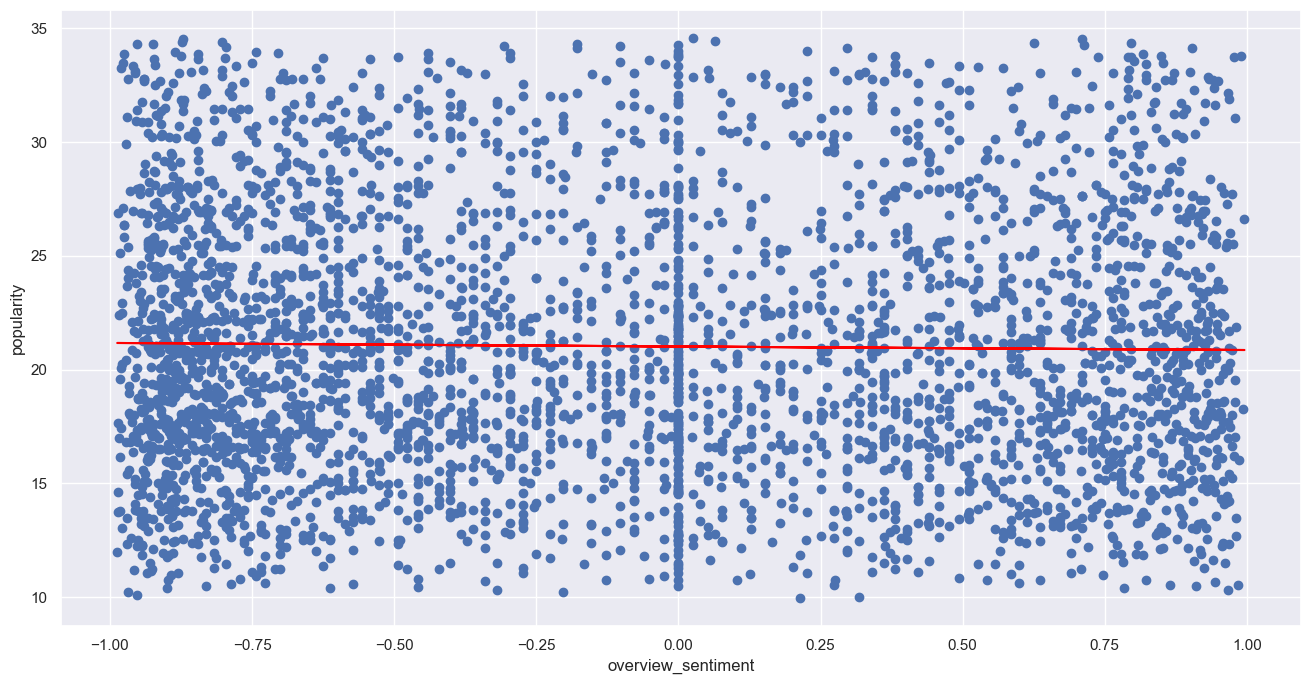

Intercept 	: b =  [21.12109138]
Coefficients 	: a =  [[-0.00629838]]
R^2 0.00010760338652016088


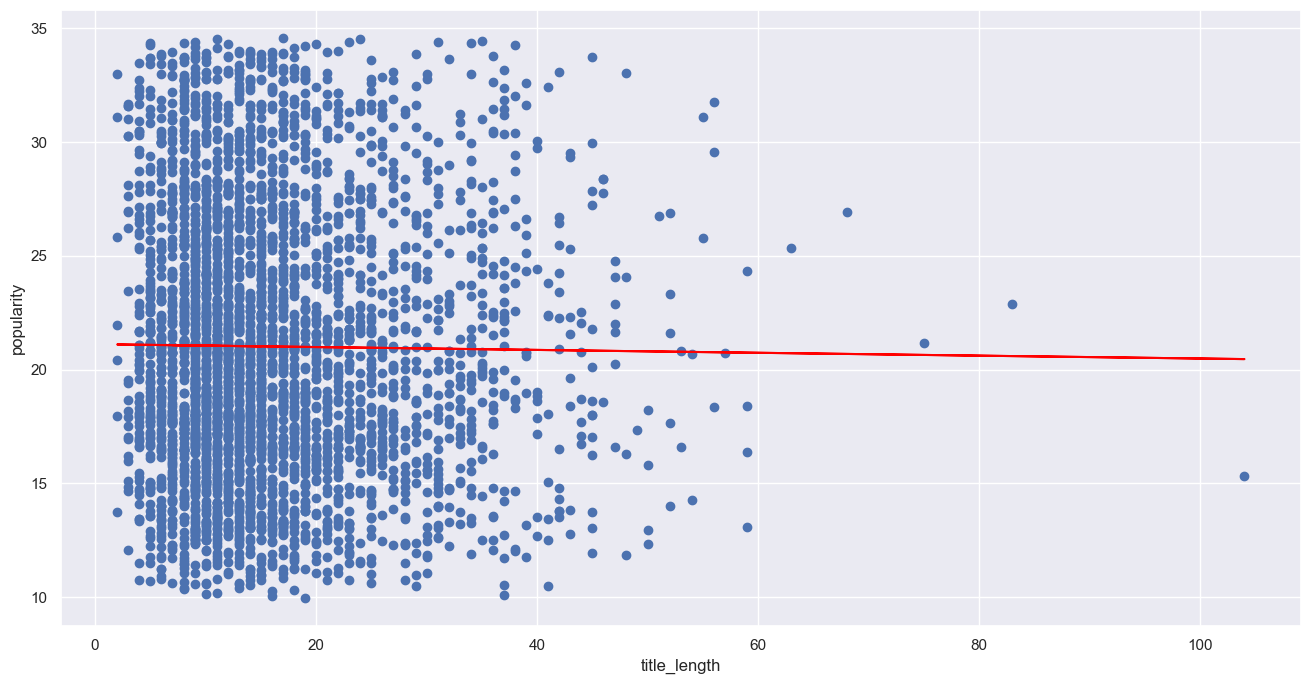

Intercept 	: b =  [21.18622664]
Coefficients 	: a =  [[-0.03238231]]
R^2 0.0001001487283204261


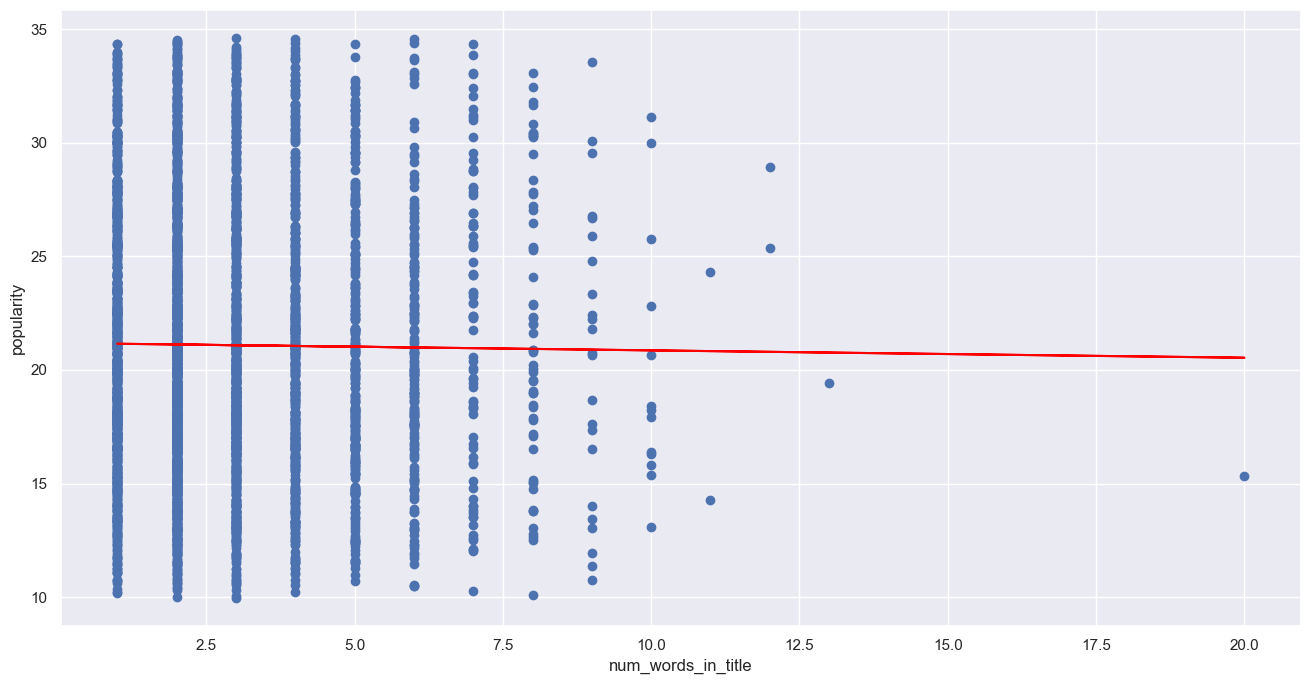

Intercept 	: b =  [20.81083895]
Coefficients 	: a =  [[0.03250621]]
R^2 0.00010294591822235244


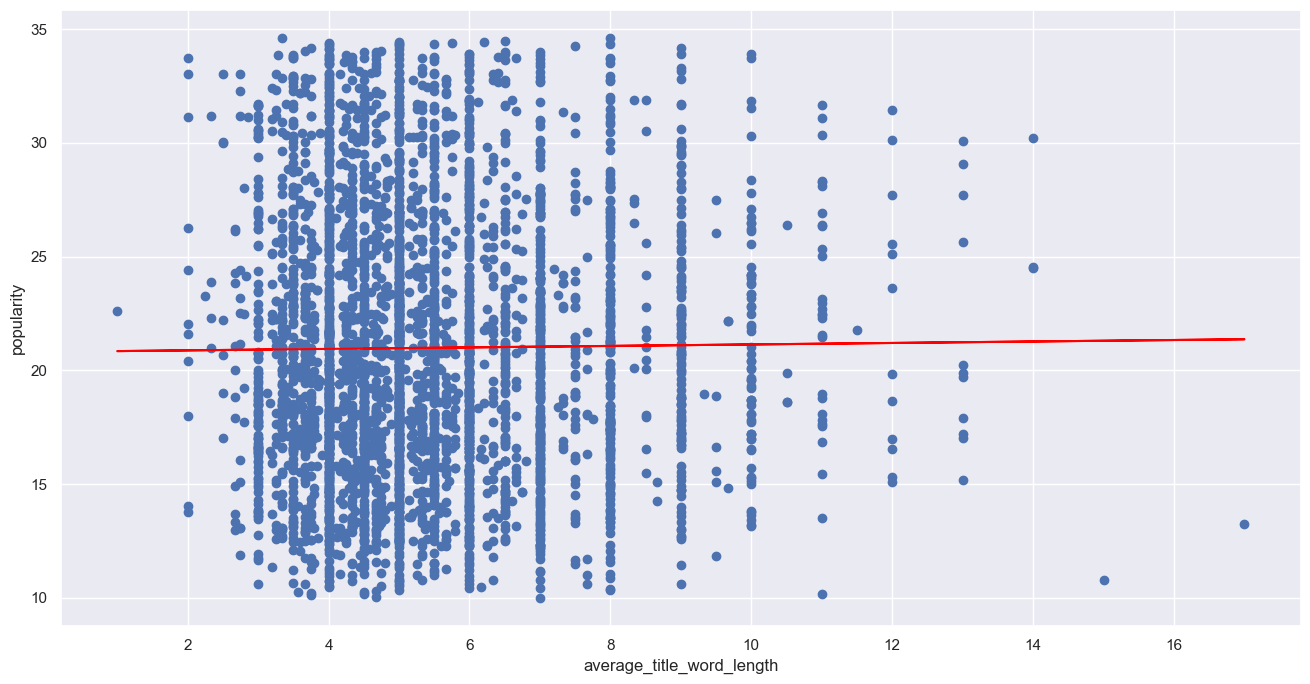

Intercept 	: b =  [20.9611754]
Coefficients 	: a =  [[0.12118246]]
R^2 7.437176700197945e-05


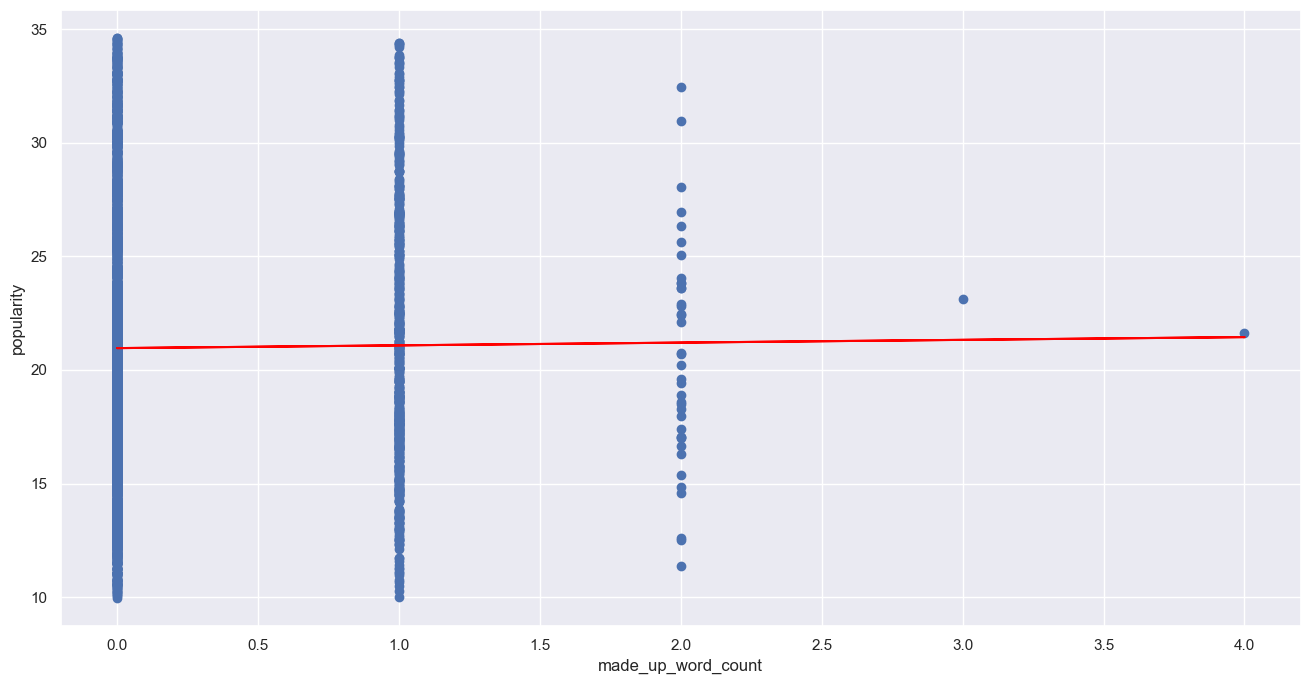

In [7]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

# Classification Tree

vote_average vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8790925496261923
Test Classification Accuracy 	: 0.8839907192575406
Train Confusion Matrix
True Positive Rate: 0.29635499207606975
False Positive Rate: 0.00769704433497537
True Negative Rate: 0.9923029556650246
False Negative Rate: 0.7036450079239303
Test Confusion Matrix
True Positive Rate: 0.33181818181818185
False Positive Rate: 0.0027958993476234857
True Negative Rate: 0.9972041006523765
False Negative Rate: 0.6681818181818182


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


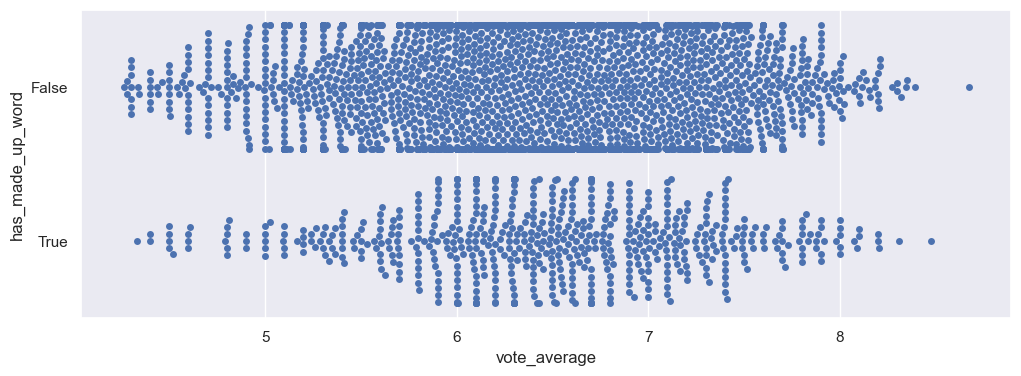

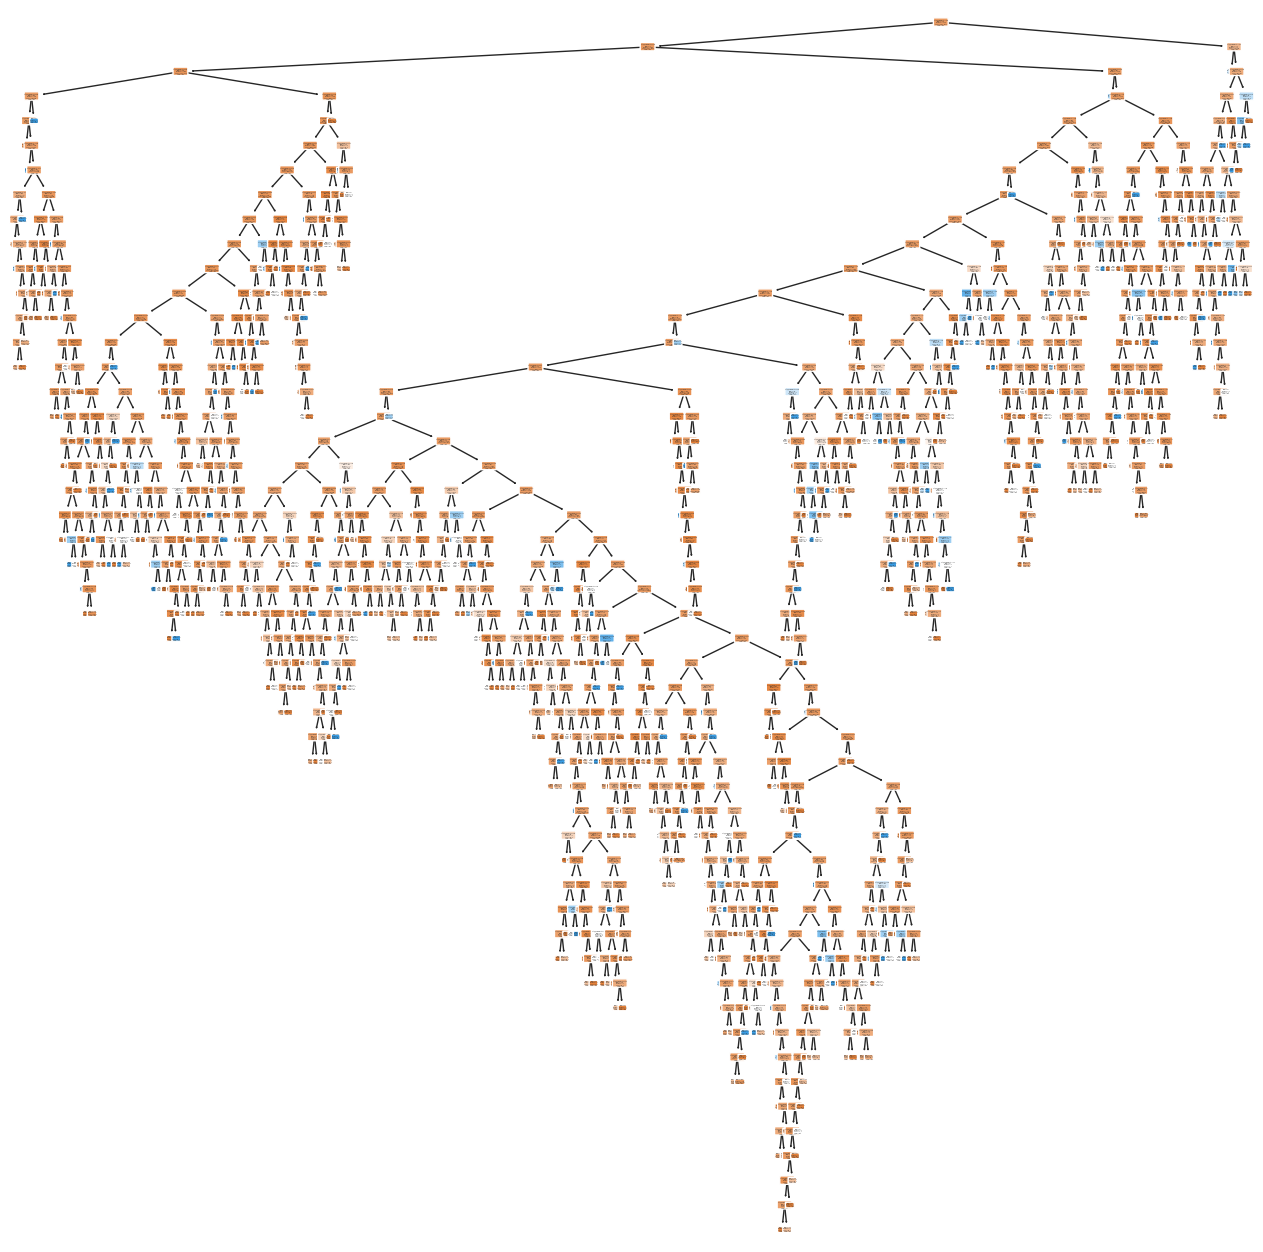

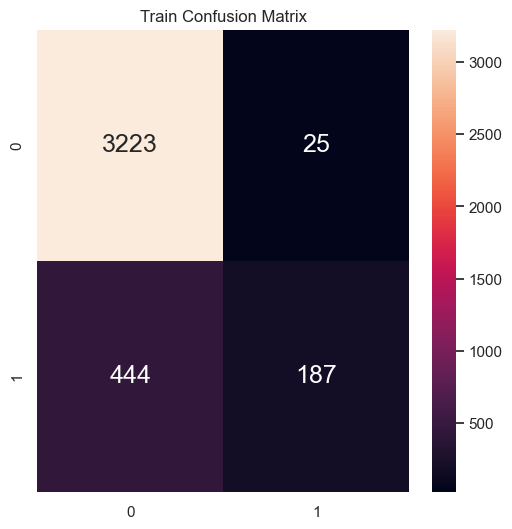

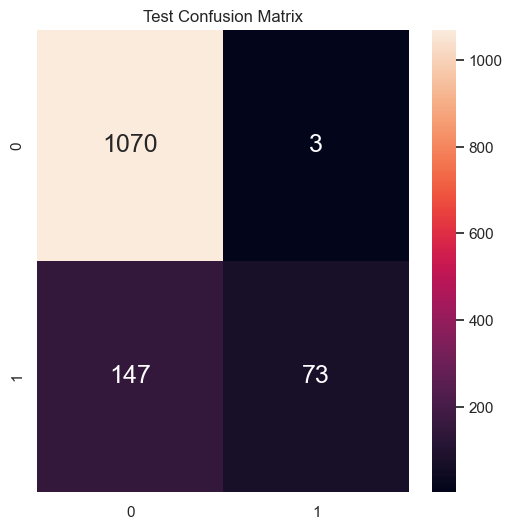

In [8]:
response_train_depth_4, response_train_pred_depth_4, response_test_depth_4, response_test_pred_depth_4 = generateClassificationTree(data,"vote_average",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(response_train_depth_4, response_train_pred_depth_4, "Train Confusion Matrix")
generateConfusionMatrix(response_test_depth_4, response_test_pred_depth_4, "Test Confusion Matrix")